### A Comprehensive Statistical Analysis of Used Car Data
**The objective of this statistical analysis is to demonstrate the importance of using**

- Descriptive statistics, Probability and Inferential statistics.
- Explore the dataset and answer various research questions to draw meaningful conclusions from data and make informed decisions using Python.

The findings of this analysis can yield valuable insights into the determinants that inform a pricing model capable of accurately forecasting the value of pre-owned vehicles. Such insights can be leveraged by businesses to formulate profitable strategies that leverage differential pricing methodologies.


The dataset contains 7906 rows, and 16 columns, representing various attributes of each car as follows:

1. Sales_ID: Serial Number of 
2. Name: Name of the car which includes Brand name and Model name.
3. Year: Manufacturing year of the car.
4. Price: The price of the used car in INR Lakhs (1 Lakh = 100,000).
5. Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG).
7. Seller_type: The type of seller who is selling the car (Individual or a Dealer).
8. Transmission: The type of transmission used by the car. (Automatic / Manual).
9. Owner: Type of ownership.
10. Mileage: The standard mileage offered by the car company in kmpl or km/kg.
11. Engine: The displacement volume of the engine in CC.
12. Max_power: The maximum power of the engine in bhp.
13. Seats: The number of seats in the car.
14. City: The location in which the car is being sold or is available for purchase (Cities).
15. Postal_code: The postal code in which the car is being sold or is available for purchase.
16. Sales_status: Status of used car sold or not (Y or N)

In [1]:
import pyforest
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import chi2_contingency

In [2]:
data=pd.read_csv('cars_dataset.csv')

<IPython.core.display.Javascript object>

In [6]:
data

,Sales_ID,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,City,Postal_code,Sales_status
0,1,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Mumbai,400001,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Ranchi,834008,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Noida,201301,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5,Dehradun,248141,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5,Chennai,600020,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5,Indore,453551,N
7902,8125,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5,Dehradun,248141,N
7903,8126,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5,Kolkata,700027,N
7904,8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5,Vellore,632001,N


In [7]:
data.head()

,Sales_ID,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,City,Postal_code,Sales_status
0,1,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Mumbai,400001,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Ranchi,834008,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Noida,201301,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5,Dehradun,248141,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5,Chennai,600020,Y


### Data Understanding

In [8]:
data.shape

(7906, 16)

In [9]:
data.columns.tolist()

['Sales_ID',
 'name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'City',
 'Postal_code',
 'Sales_status']

In [10]:
data.dtypes

Sales_ID          int64
name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
mileage          object
engine           object
max_power        object
seats             int64
City             object
Postal_code       int64
Sales_status     object
dtype: object

In [11]:
data.isnull().sum()

Sales_ID         0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
City             0
Postal_code      0
Sales_status     0
dtype: int64

There are no missing values in given data

In [12]:
data.nunique()

Sales_ID         7906
name             1982
year               27
selling_price     670
km_driven         898
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         320
seats               9
City               29
Postal_code        32
Sales_status        2
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales_ID       7906 non-null   int64 
 1   name           7906 non-null   object
 2   year           7906 non-null   int64 
 3   selling_price  7906 non-null   int64 
 4   km_driven      7906 non-null   int64 
 5   fuel           7906 non-null   object
 6   seller_type    7906 non-null   object
 7   transmission   7906 non-null   object
 8   owner          7906 non-null   object
 9   mileage        7906 non-null   object
 10  engine         7906 non-null   object
 11  max_power      7906 non-null   object
 12  seats          7906 non-null   int64 
 13  City           7906 non-null   object
 14  Postal_code    7906 non-null   int64 
 15  Sales_status   7906 non-null   object
dtypes: int64(6), object(10)
memory usage: 988.4+ KB


In [14]:
data.describe()

,Sales_ID,year,selling_price,km_driven,seats,Postal_code
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,5.416393,503806.024285
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,0.959208,205061.544757
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,2.000000,110039.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,5.000000,391510.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,5.000000,524225.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,5.000000,680503.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,14.000000,834008.000000


In [15]:
data.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,City,Sales_status
count,7906,7906,7906,7906,7906,7906,7906,7906,7906,7906
unique,1982,4,3,2,5,393,121,320,29,2
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,Delhi,N
freq,129,4299,6563,6865,5215,225,1017,377,320,5906


### Data Preprocessing

In [16]:
data['mileage'].value_counts()

mileage
18.9 kmpl      225
19.7 kmpl      173
18.6 kmpl      164
21.1 kmpl      157
17.0 kmpl      133
              ... 
16.34 kmpl       1
19.69 kmpl       1
20.88 km/kg      1
17.8 km/kg       1
16.51 kmpl       1
Name: count, Length: 393, dtype: int64

In [17]:
## Mileage- Remove kmpl and km/kg
data['mileage']=data['mileage'].apply(lambda x:float(x.split()[0])
    if 'kmpl' in x else float(x.split()[0])
    if 'km/kg' in x else None)

In [18]:
data['mileage'].value_counts()

mileage
18.90    225
19.70    173
18.60    164
21.10    158
17.00    133
        ... 
17.42      1
18.24      1
10.71      1
21.76      1
16.51      1
Name: count, Length: 381, dtype: int64

In [19]:
data['engine'].value_counts()

engine
1248 CC    1017
1197 CC     832
998 CC      453
796 CC      443
2179 CC     389
           ... 
2835 CC       1
1489 CC       1
1422 CC       1
2496 CC       1
1950 CC       1
Name: count, Length: 121, dtype: int64

In [20]:
## engine- remove 'CC'
for col in ['engine']:
    data[col]=data[col].str.replace('CC','')

In [21]:
data['engine'].value_counts()

engine
1248     1017
1197      832
998       453
796       443
2179      389
         ... 
2835        1
1489        1
1422        1
2496        1
1950        1
Name: count, Length: 121, dtype: int64

In [22]:
data['max_power'].value_counts()

max_power
74 bhp        377
81.80 bhp     220
88.5 bhp      204
67 bhp        165
46.3 bhp      162
             ... 
57 bhp          1
58.33 bhp       1
68.4 bhp        1
170.63 bhp      1
135.1 bhp       1
Name: count, Length: 320, dtype: int64

In [23]:
## max_power- Remove bhp
for col in ['max_power']:
    data[col]=data[col].str.replace('bhp','')

In [24]:
## Convert mileage, engine and max_power to numeric
## As they look like numeric but are given as object datatype
for col in ['mileage','engine','max_power']:
    data[col]=pd.to_numeric(data[col],errors='coerce')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# Sales_ID and Postal_code to object datatype
data['Sales_ID']=data['Sales_ID'].astype(object)
data['Postal_code'] = data['Postal_code'].astype(object)

In [26]:
data.dtypes

Sales_ID          object
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
City              object
Postal_code       object
Sales_status      object
dtype: object

<IPython.core.display.Javascript object>

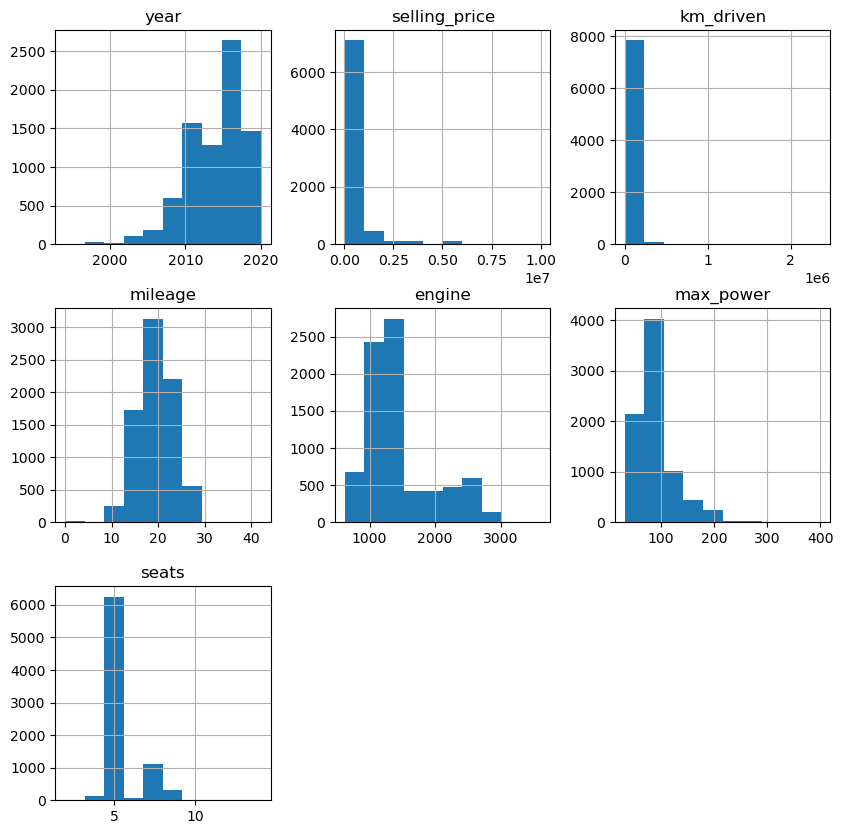

In [27]:
data.hist(figsize=(10,10))
plt.show()

### Q(1) 
### a) What are the characteristics of the cars listed in the used car dataset? 
- What is the average mileage and selling price of the cars? 
- What is the range of prices? What is the interquartile range of prices? 
- What is the most common fuel type and transmission type? 
- Is there a significant difference in the mean selling price for cars sold by individual sellers compared to those sold by dealers in the used car dataset?

In [28]:
avg_mileage = data['mileage'].mean()
avg_price = data['selling_price'].mean()
price_range = data['selling_price'].max() - data['selling_price'].min()
price_iqr = data['selling_price'].quantile(0.75) - data['selling_price'].quantile(0.25)


In [29]:
print('Average mileage-',avg_mileage)
print('Average selling price of cars-',avg_price)
print('Range of selling price of cars-',price_range)
print('Interquartile Range of selling price of cars-',price_iqr)


Average mileage- 19.4198608651657
Average selling price of cars- 649813.720844928
Range of selling price of cars- 9970001
Interquartile Range of selling price of cars- 420000.0


In [30]:
most_common_fuel = data['fuel'].mode()[0]
most_common_transmission = data['transmission'].mode()[0]

print('Most common Fuel type-',most_common_fuel)
print('Most common transmission type-',most_common_transmission)

Most common Fuel type- Diesel
Most common transmission type- Manual


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

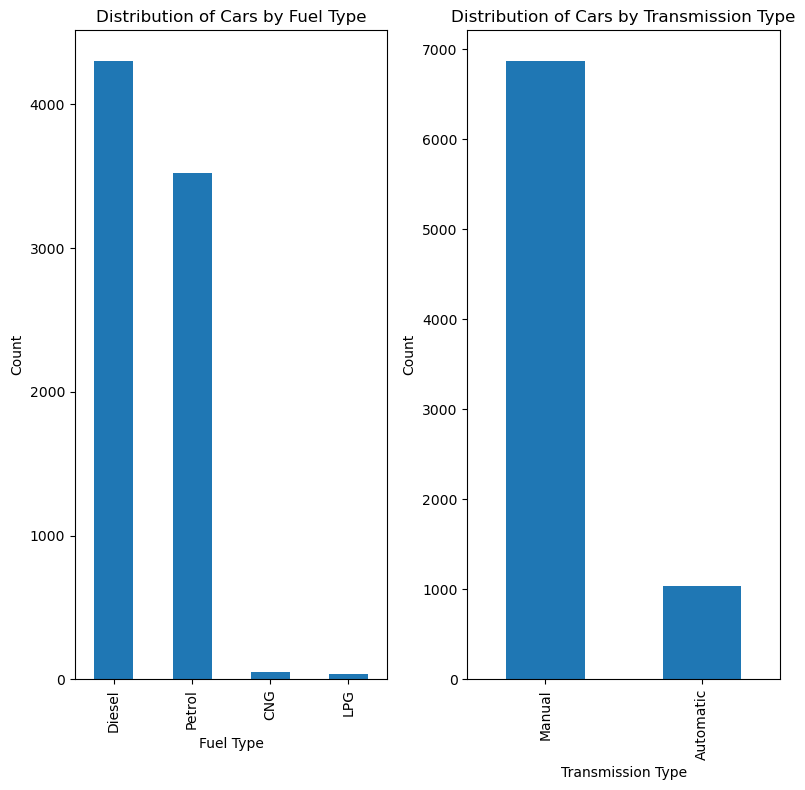

In [31]:
fig, axes= plt.subplots(nrows=1,ncols=2, figsize=(8,8))

data['fuel'].value_counts().plot(kind='bar',ax=axes[0])
axes[0].set_title('Distribution of Cars by Fuel Type')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Count')

data['transmission'].value_counts().plot(kind='bar',ax=axes[1])
axes[1].set_title('Distribution of Cars by Transmission Type')
axes[1].set_xlabel('Transmission Type')
axes[1].set_ylabel('Count')

plt.tight_layout()

# Display the plots
plt.show()

In [32]:
mean_price_by_seller = data.groupby('seller_type')['selling_price'].mean()
mean_price_by_seller

seller_type
Dealer              1.459910e+06
Individual          5.077058e+05
Trustmark Dealer    8.018390e+05
Name: selling_price, dtype: float64

H0: No significant difference in the mean selling price of cars sold by individual seller than those by dealer; Mu_individual= Mu_dealer

H1: There is a significant difference in the mean selling price of cars sold by individual seller than those by dealer; Mu_individual != Mu_dealer

In [33]:
alpha=0.5
individual_sellers = data[data['seller_type'] == 'Individual']
dealers = data[data['seller_type'] == 'Dealer']

In [34]:
statistic,pvalue=st.levene(individual_sellers['selling_price'],dealers['selling_price'])
print(statistic,pvalue)
if pvalue<alpha:
    print("We can conclude that the population variances are different")
else:
    print("Population variances are same")

1097.6496012201073 4.438895875472812e-225
We can conclude that the population variances are different


In [35]:
# Perform independent t-test to compare the means
t_stat, p_value = st.ttest_ind(individual_sellers['selling_price'], dealers['selling_price'], equal_var=False)

# Define the significance level
alpha = 0.05

print(t_stat,p_value)

-19.93430886203481 4.173613427100124e-76


In [36]:
if p_value < alpha:
    print("There is a significant difference in the mean selling price for cars sold by individual sellers compared to those sold by dealers in the used car dataset.")
else:
    print("There is no significant difference in the mean selling price for cars sold by individual sellers compared to those sold by dealers in the used car dataset.")


There is a significant difference in the mean selling price for cars sold by individual sellers compared to those sold by dealers in the used car dataset.


### Ques1 (b) 
- Based on the used car dataset, which transmission type is the most frequently used among the cars listed? 
- Can we determine the proportion of each transmission type and identify the one that occurs most frequently? 
- How does this information relate to potential buyers who may have a preference for a specific transmission type?

In [37]:
most_common_transmission_type = data['transmission'].value_counts().idxmax()
transmission_type_proportion = data['transmission'].value_counts(normalize=True)

In [38]:
print('Most frequently used transmission type-',most_common_transmission_type)
print('Proportion of each transmission type-',transmission_type_proportion )

Most frequently used transmission type- Manual
Proportion of each transmission type- transmission
Manual       0.868328
Automatic    0.131672
Name: proportion, dtype: float64


 In this case, manual transmissions constitute approximately 86.83% of the dataset, while automatic transmissions make up around 13.17%. Thus, manual is most frequently used transmission type.
 
 Thus, buyers who prefer manual transmissions may find it easier to find a suitable car since the majority of the cars in the dataset have manual transmissions. Conversely, buyers looking for automatic transmissions may have fewer options available.

### Ques1 (c) 
- How does the selling price of cars in the dataset vary with respect to factors such as the car's mileage, engine size, and year of manufacture? 
- Can we visualize this relationship to gain insights into how these variables affect the selling price of a car?

In [39]:
corr1 = data['selling_price'].corr(data['mileage'])
corr2 = data['selling_price'].corr(data['engine'])
corr3 = data['selling_price'].corr(data['year'])

# The correlation value
print("Correlation between selling_price and mileage:", corr1)
print("Correlation between selling_price and engine:", corr2)
print("Correlation between selling_price and year:", corr3)

Correlation between selling_price and mileage: -0.12627994951355337
Correlation between selling_price and engine: 0.4556818000356147
Correlation between selling_price and year: 0.4123015581711652


<IPython.core.display.Javascript object>

<Axes: xlabel='mileage', ylabel='selling_price'>

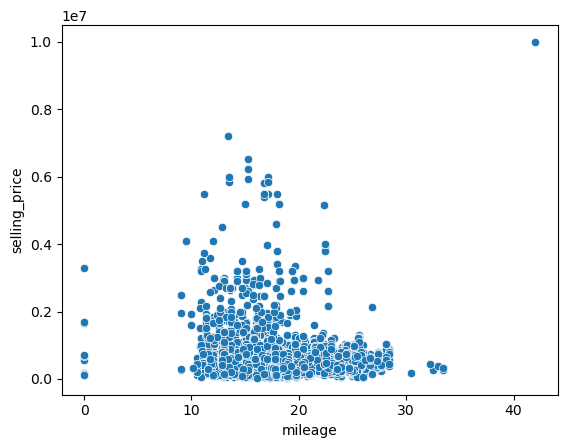

In [40]:
sns.scatterplot(y='selling_price',x='mileage',data=data)

### Insight- Effect of car's mileage on selling price of car
Weak negative correlation between the two variables. As the mileage of a car increases, the selling price tends to slightly decrease. Cars with more mileage have less selling price whereas, cars with less mileage are associated with higher selling prices. High mileage cars are generally perceived as having more wear and tear, which can lower their resale value. 

However, the correlation coefficient suggests that the relationship is not very strong, implying that other factors may have a more significant impact on the selling price.

<IPython.core.display.Javascript object>

<Axes: xlabel='engine', ylabel='selling_price'>

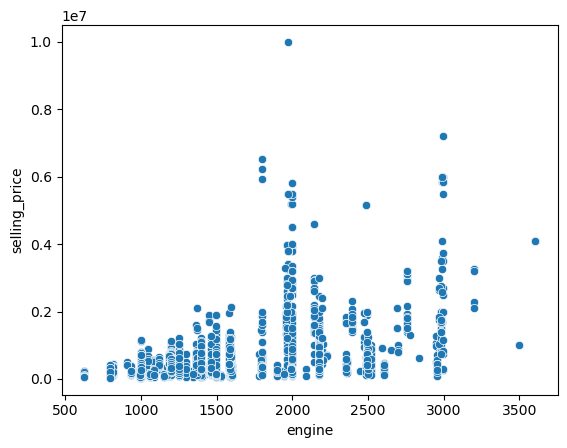

In [41]:
sns.scatterplot(y='selling_price',x='engine',data=data)

### Insight- Effect of engine on selling price of car
Moderate positive correlation between the two variables. As the engine size of a car increases, the selling price tends to increase as well. The positive correlation suggests that larger engine sizes are associated with higher selling prices, although it's important to consider other factors that may influence the price. Vehicles with larger engine CCs command higher selling prices, especially among buyers who prioritize performance.

<IPython.core.display.Javascript object>

<Axes: xlabel='year', ylabel='selling_price'>

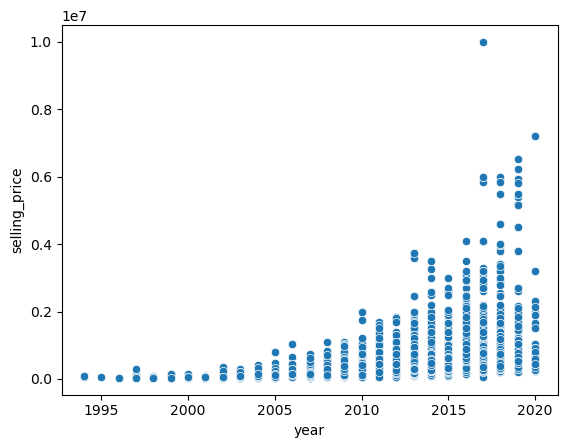

In [42]:
sns.scatterplot(y='selling_price',x='year',data=data)

### Insight- Effect of Manufacturing year have on selling price of car
Moderate positive correlation between the two variables. As the year of manufacture increases (indicating a more recent car), the selling price tends to increase as well. Cars with manufacturing year from 2015 to 2020 command higher selling prices compared to older ones. This might be because newer cars are often perceived to be in better condition compared to older ones. They may have lower mileage, fewer mechanical issues, and less cosmetic wear and tear, leading to higher selling prices.

### Ques1 (d)
- Does the covariance between the selling price of a used car and its mileage suggest a strong or weak relationship between the two variables? 
- How does this covariance relate to potential buyers who may want to consider the mileage of a car when making purchasing decisions?

In [43]:
covariance_price_mileage = np.cov(data['selling_price'], data['mileage'])[0][1]
covariance_price_mileage

<IPython.core.display.Javascript object>

-414682.4053633232

Since the covariance is negative, it suggests an inverse relationship between selling price and mileage. That is, as mileage increases, selling price tends to decrease, and vice versa. However, without knowing the units of measurement for selling price and mileage, we cannot determine the strength of the relationship solely based on covariance.

To assess the strength of the relationship between selling price and mileage, we'll have to calculate correlation coefficient.

For potential buyers who may want to consider the mileage of a car when making purchasing decisions, negative covariance implies that cars with higher mileage tend to sell for lower prices. Therefore, buyers who prioritize lower prices or are concerned about potential maintenance costs may prefer cars with lower mileage

### e) If a car has a selling price of over $10,000, what is the probability that it has an automatic transmission?

In [45]:
prob_automatic_over_10k = len(data[(data['selling_price'] > 10) & (data['transmission'] == 'Automatic')]) / len(data[data['selling_price'] > 10])
print("Probability of Automatic Transmission for Price over $10,000:", prob_automatic_over_10k)

Probability of Automatic Transmission for Price over $10,000: 0.13167214773589678


### Ques2 (a) 
- How does the median selling price of cars in the used car dataset vary across different fuel types and transmission types?
- Can we group the data by fuel type and transmission type and calculate the median selling price for each group?

In [46]:
median_price_fuel = data.groupby(['fuel'])['selling_price'].median()
median_price_transmission = data.groupby(['transmission'])['selling_price'].median()


print("\nMedian Selling Price for Fuel:" , median_price_fuel)
print("\nMedian Selling Price for Transmission:", median_price_transmission)


Median Selling Price for Fuel: fuel
CNG       330000.0
Diesel    550000.0
LPG       200000.0
Petrol    350000.0
Name: selling_price, dtype: float64

Median Selling Price for Transmission: transmission
Automatic    1100000.0
Manual        409999.0
Name: selling_price, dtype: float64


In [47]:
median_price_by_fuel_transmission = data.groupby(['fuel', 'transmission'])['selling_price'].median()
median_price_by_fuel_transmission

fuel    transmission
CNG     Manual           330000.0
Diesel  Automatic       2475000.0
        Manual           503000.0
LPG     Manual           200000.0
Petrol  Automatic        650000.0
        Manual           310000.0
Name: selling_price, dtype: float64

#### Insights:

- Among the different fuel types, Diesel with Automatic transmission has the highest median selling price of 2,475,000.0. This combination may be preferred by buyers who value the efficiency and convenience of an automatic transmission along with the power and fuel economy of a diesel engine.
- Diesel with Manual transmission has the second-highest median selling price of 503,000.0. This suggests that the combination of a diesel engine and manual transmission is also valued by buyers, likely due to the durability, fuel efficiency, and control offered by diesel engines.
- Petrol with Automatic transmission has a median selling price of 650,000.0, indicating that this combination is also sought after. Automatic transmissions are generally preferred for their ease of use and smooth driving experience.
- Petrol with Manual transmission has a lower median selling price of 310,000.0 compared to the automatic variant. Manual transmissions are often favored by enthusiasts or buyers looking for a more engaging driving experience, and they generally come at a lower price point.
- CNG and LPG variants, both with manual transmission, have median selling prices of 330,000.0 and 200,000.0, respectively. These alternative fuel options may appeal to buyers seeking lower fuel costs and reduced emissions.

### Ques2 (b)
- In the context of analyzing the used car market, can we determine if there is a significant difference in prices of cars based on the fuel type they use? 
- This information can help buyers make informed decisions when purchasing a used car and may also inform government policies aimed at promoting the use of certain types of fuel in vehicles. (frame hypothesis and draw inferences

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

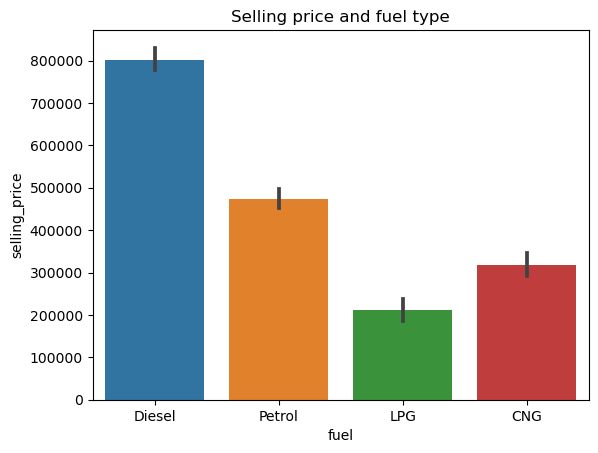

In [48]:
sns.barplot(x=data['fuel'],y=data['selling_price'])
plt.title("Selling price and fuel type")
plt.show()

In [49]:
petrol_price = data.loc[data['fuel'] == 'Petrol', 'selling_price']
diesel_price = data.loc[data['fuel'] == 'Diesel', 'selling_price']
cng_price = data.loc[data['fuel'] == 'CNG', 'selling_price']
lpg_price = data.loc[data['fuel'] == 'LPG', 'selling_price']


# Perform an independent sample t-test
t_statistic, p_value = st.ttest_ind(petrol_price, diesel_price)


# The t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Define the significance level (alpha)
alpha = 0.05


# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in prices based on fuel type(petrol and diesel)")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in prices based on fuel type(petrol and diesel)")


T-statistic: -18.124727173371923
P-value: 5.961371756123761e-72
Reject the null hypothesis
There is a significant difference in prices based on fuel type(petrol and diesel)


### Ques3 (a) 
- In the used car dataset, there are some mileage values that are represented in units other than miles, such as kilometers.
- Convert these values into miles and check the mileage distribution. (Note: Convert mileage in kilometers to miles by multiplying by 0.621371.)

In [50]:
## Since all values are given in kilometers so we add new column as mileage_miles
data['mileage'] = data['mileage'] * 0.621371

In [51]:
data['mileage']

0       14.540081
1       13.135783
2       10.998267
3       14.291533
4       10.004073
          ...    
7901    11.495363
7902    10.439033
7903    11.992460
7904    14.645714
7905    14.645714
Name: mileage, Length: 7906, dtype: float64

<IPython.core.display.Javascript object>

<Axes: xlabel='mileage', ylabel='Density'>

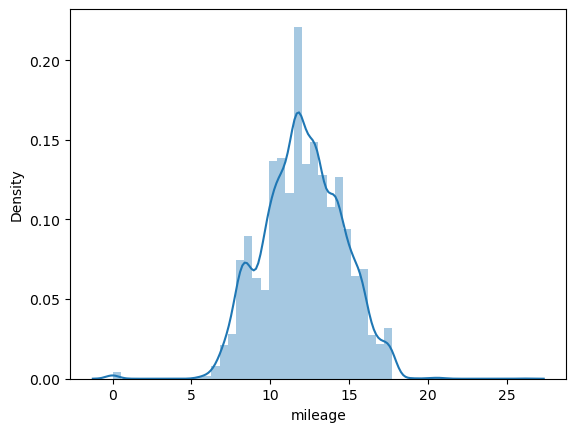

In [52]:
sns.distplot(data.mileage)

####  Mileage distribution after convrting to miles looks approximately like normal distribution

### Ques3 (b) 
- You are a data analyst working for a car dealership company. Investigate whether there is a statistically significant difference in the distribution of the number of seats between cars with automatic and manual transmissions. Perform a hypothesis test to determine whether there is a significant difference in the number of seats for cars with automatic and manual transmissions

#### Assumption: Data is normally distributed
H0: There is no significant difference in the number of seats between cars with automatic and manual transmissions.

H1: There is significant difference in the number of seats between cars with automatic and manual transmissions.

In [53]:
alpha=0.5
seat_automatic=data[data.transmission=='Automatic']['seats']
seat_manual=data[data.transmission=='Manual']['seats']

Asuumptions:

1.Test of Normality:

Since the sample size are>30 --> as per CLT, the sampling distribution follows normal;

2.Test of Variance Equality: Leven Test; alpha=0.05 We need to check wether the populations variance are equal or not?

H0: pop1_var=Pop2_var;

H1:pop1_var != pop2_var;

In [54]:
st.levene(seat_automatic,seat_manual)

LeveneResult(statistic=45.65848879649594, pvalue=1.5076146904294063e-11)

Inference: pvalue(0.000000000001)<alpha(0.05)---> reject H0; We can conclude that the population variances are different

In [55]:
st.ttest_ind(seat_automatic,seat_manual,equal_var=False)

Ttest_indResult(statistic=-8.180937812361945, pvalue=5.4468421426690085e-16)

### Inferences-
Since the p-value(close to 0) is extremely small we reject the null hypothesis. Therefore, there is significant difference in the number of seats between cars with automatic and manual transmissions. 

The negative t-statistic indicates that, on average, cars with automatic transmissions have fewer seats compared to cars with manual transmissions.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

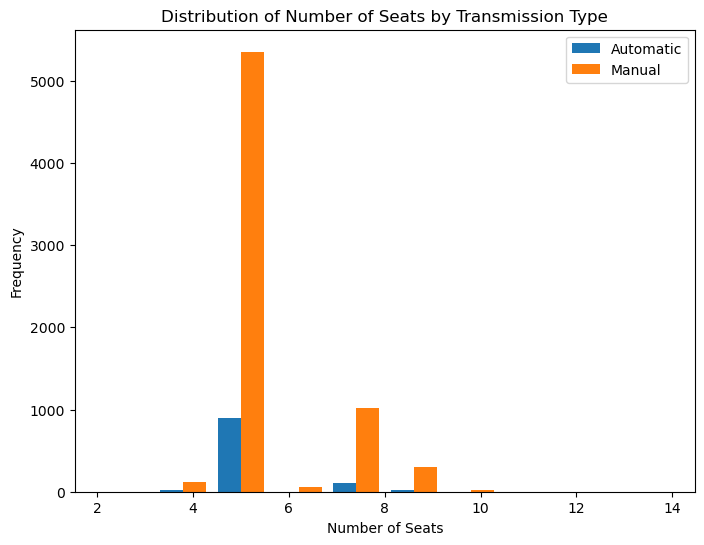

In [56]:
plt.figure(figsize=(8, 6))
plt.hist([seat_automatic, seat_manual], bins=10, label=['Automatic', 'Manual'])

# Set plot labels and title
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Seats by Transmission Type')

plt.legend()

plt.show()

### Q(4) 
### a) Create a stacked histogram to analyze the distribution of mileage for cars based on their fuel type and transmission.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

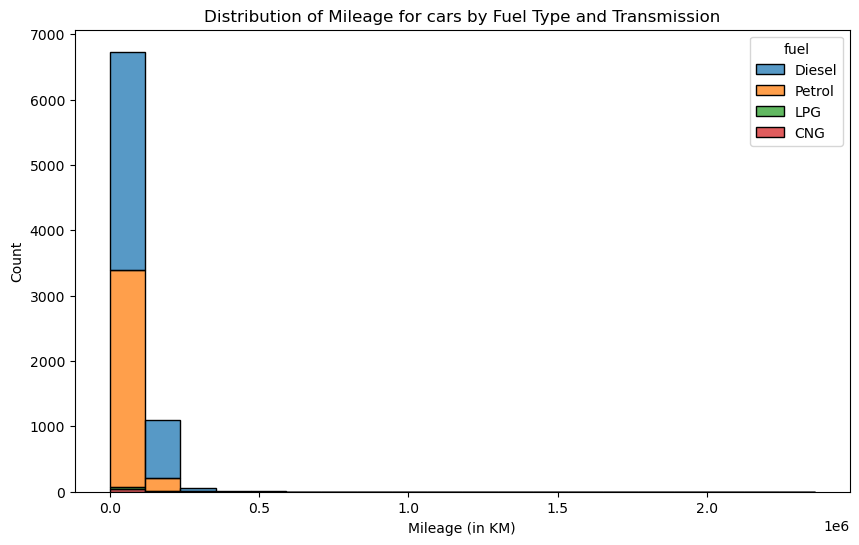

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='km_driven', hue='fuel', multiple='stack', bins=20)
plt.title('Distribution of Mileage for cars by Fuel Type and Transmission')
plt.xlabel('Mileage (in KM)')
plt.ylabel('Count')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

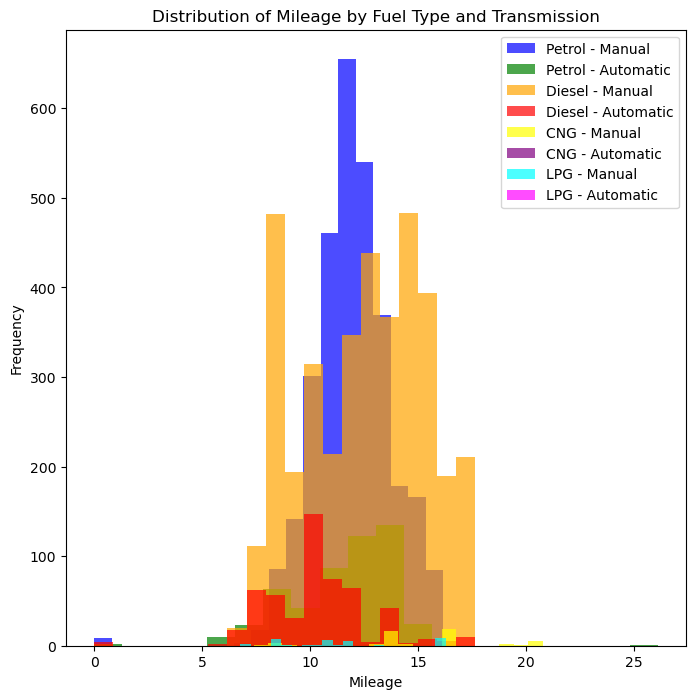

In [58]:
petrol_manual = data[(data['fuel'] == 'Petrol') & (data['transmission'] == 'Manual')]
petrol_auto = data[(data['fuel'] == 'Petrol') & (data['transmission'] == 'Automatic')]
diesel_manual = data[(data['fuel'] == 'Diesel') & (data['transmission'] == 'Manual')]
diesel_auto = data[(data['fuel'] == 'Diesel') & (data['transmission'] == 'Automatic')]
cng_manual = data[(data['fuel'] == 'CNG') & (data['transmission'] == 'Manual')]
cng_auto = data[(data['fuel'] == 'CNG') & (data['transmission'] == 'Automatic')]
lpg_manual = data[(data['fuel'] == 'LPG') & (data['transmission'] == 'Manual')]
lpg_auto = data[(data['fuel'] == 'LPG') & (data['transmission'] == 'Automatic')]
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Create stacked histograms for each group
plt.hist(petrol_manual['mileage'], bins=20, alpha=0.7, label='Petrol - Manual', color='blue', stacked=True)
plt.hist(petrol_auto['mileage'], bins=20, alpha=0.7, label='Petrol - Automatic', color='green', stacked=True)
plt.hist(diesel_manual['mileage'], bins=20, alpha=0.7, label='Diesel - Manual', color='orange', stacked=True)
plt.hist(diesel_auto['mileage'], bins=20, alpha=0.7, label='Diesel - Automatic', color='red', stacked=True)
plt.hist(cng_manual['mileage'], bins=20, alpha=0.7, label='CNG - Manual', color='yellow', stacked=True)
plt.hist(cng_auto['mileage'], bins=20, alpha=0.7, label='CNG - Automatic', color='purple', stacked=True)
plt.hist(lpg_manual['mileage'], bins=20, alpha=0.7, label='LPG - Manual', color='cyan', stacked=True)
plt.hist(lpg_auto['mileage'], bins=20, alpha=0.7, label='LPG - Automatic', color='magenta', stacked=True)

# Add labels and title
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Distribution of Mileage by Fuel Type and Transmission')

# Add legend
plt.legend()

# Show the plot
plt.show()

### Ques4 (b)
- As a data analyst in a car dealership company, you are analyzing the company's sales data to identify any significant differences in the selling prices of cars based on the fuel type. If there is a statistically significant difference in the selling price distribution for different fuel types, which fuel types have the highest and lowest selling prices? Your task is to perform an analysis of the data and report your findings to the management.

In [59]:
# Hypothesis testing for price difference based on fuel type
# Assumption: Data is normally distributed
## H0: There is no significant difference in the selling price distribution for different fuel types.
## H1:there is a statistically significant difference in the selling price distribution for different fuel types.
fuel_types=data['fuel'].unique()
price_by_fuel = [data[data['fuel'] == fuel]['selling_price'] for fuel in fuel_types]
f_stat_price_fuel, p_value_price_fuel = stats.f_oneway(*price_by_fuel)
print("F-Statistics of the ANOVA test is:",f_stat_price_fuel)
print("\np-value of the ANOVA test is:",p_value_price_fuel)

<IPython.core.display.Javascript object>

F-Statistics of the ANOVA test is: 117.30554435257852

p-value of the ANOVA test is: 2.52340474514499e-74


### Inferences-
Since the p-value is extremely small (much smaller than the commonly used significance level of 0.05), we reject the null hypothesis.  This indicates that there is a statistically significant difference in the selling price distribution for different fuel types.

In [60]:
## To determine which fuel types have the highest and lowest selling prices
# Calculate mean selling prices for each fuel type
mean_price_by_fuel = data.groupby('fuel')['selling_price'].mean()

# Print mean selling prices for each fuel type
print("Mean Selling Prices by Fuel Type:")
print(mean_price_by_fuel)

Mean Selling Prices by Fuel Type:
fuel
CNG       317903.788462
Diesel    802450.282624
LPG       210885.714286
Petrol    472665.203125
Name: selling_price, dtype: float64


### Inferences-
After calculating the mean selling prices for each fuel type, we can see that Diesel has highest selling price whereas LPG has lowest selling price

### Q(5) 
### a) How many cars are there in each make and model category in the used car dataset? Can we provide a distribution of the cars based on their make and model?

In [61]:
car_distribution = data['name'].value_counts()
car_distribution.reset_index()

,name,count
0,Maruti Swift Dzire VDI,129
1,Maruti Alto 800 LXI,82
2,Maruti Alto LXi,71
3,BMW X4 M Sport X xDrive20d,62
4,Maruti Swift VDI,61
...,...,...
1977,Honda Jazz 1.2 S AT i VTEC,1
1978,Hyundai i20 Active 1.2 SX with AVN,1
1979,Ambassador CLASSIC 1500 DSL AC,1
1980,Tata Harrier XZ Dark Edition BSIV,1


In [62]:
data[['make','model']]=data['name'].str.split(' ',n=1,expand=True)
data['make'].value_counts()

make
Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

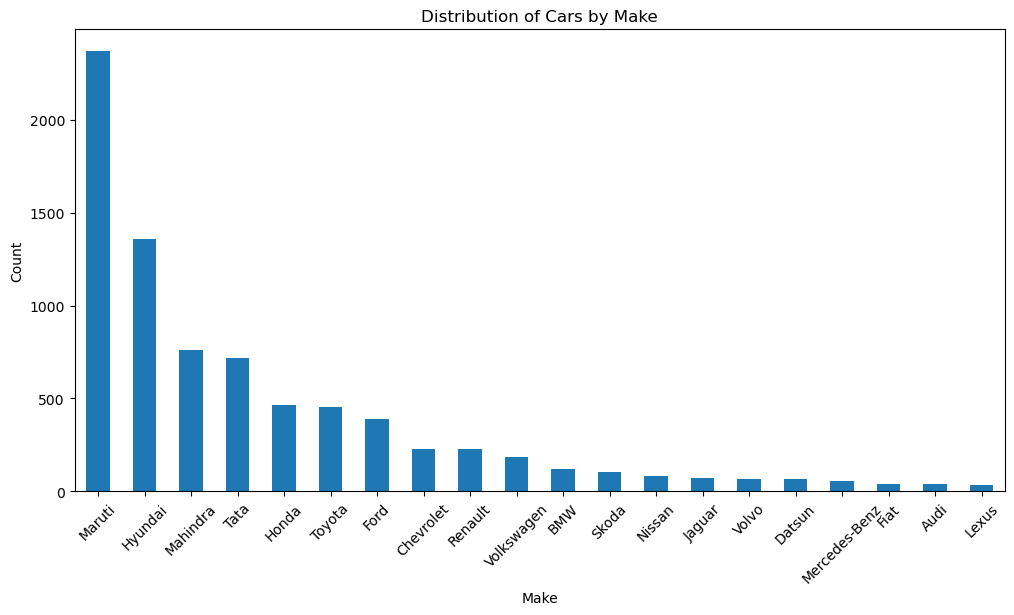

In [63]:
make_distribution = data['make'].value_counts().head(20)

plt.figure(figsize=(12, 6))
make_distribution.plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Distribution of Cars by Make')
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

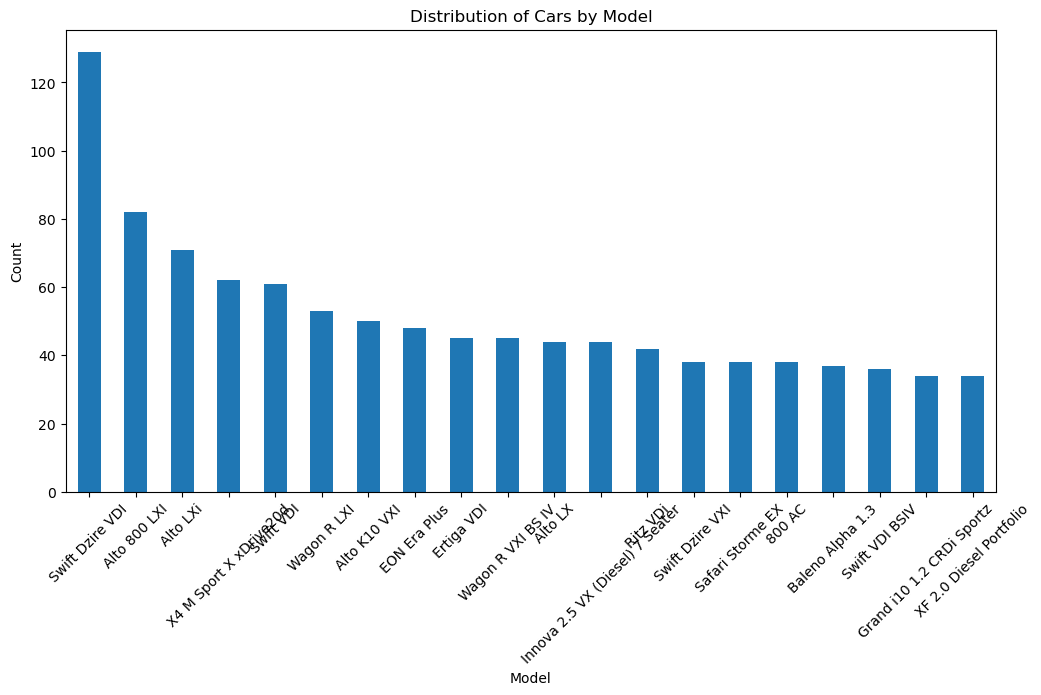

In [64]:
model_distribution = data['model'].value_counts().head(20)
plt.figure(figsize=(12, 6))
model_distribution.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Distribution of Cars by Model')
plt.xticks(rotation=45)
plt.show()

### b) Does the distribution of car models vary significantly across different owner types in the used car dataset?
Note: Use appropriate test to determine if there is a significant relationship between car models and
owner types

In [65]:
pd.crosstab(data.name, data.owner)

<IPython.core.display.Javascript object>

owner,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
name,,,,,
Ambassador CLASSIC 1500 DSL AC,0,0,1,0,0
Ambassador Classic 2000 DSZ AC PS,0,0,1,0,0
Ambassador Grand 1500 DSZ BSIII,0,0,1,0,0
Ambassador Grand 2000 DSZ PW CL,0,0,0,0,1
Ashok Leyland Stile LE,0,0,1,0,0
...,...,...,...,...,...
Volvo V40 D3 R-Design,29,0,0,0,0
Volvo XC40 D4 Inscription BSIV,30,0,0,0,0
Volvo XC40 D4 R-Design,2,0,0,0,0


In [66]:
# Chi-square test for relationship between car models and owner types
# Null hypothesis: There is no significant relationship between car models and owner types
# Alternative hypothesis: There is a significant relationship between car models and owner types

In [67]:
contingency_table = pd.crosstab(data['name'], data['owner'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value)

<IPython.core.display.Javascript object>

Chi-square Statistic: 16109.76999495576
P-value: 0.0


### Inference-
Since the p-value is extremely small (close to 0), much smaller than the commonly used significance level of 0.05, we reject the null hypothesis. This indicates that there is a statistically significant relationship between car models and owner types in the used car dataset.

The chi-square statistic and the corresponding p-value suggest that there is a strong association between the car models and owner types. This means that the distribution of car models varies significantly across different owner types.